In [1]:
pip install pandas matplotlib scikit-learn

In [2]:
import pandas as pd

data = pd.read_csv("dataset.csv")
data

,Name,Math,Science,English,Attendance,StudyHours
0,Aarav,78,85,80,90,2.0
1,Diya,45,50,55,65,1.0
2,Rohan,88,92,84,95,3.0
3,Meera,60,58,65,75,1.5
4,Kabir,35,40,45,60,0.5
5,Anaya,91,89,93,98,3.5
6,Ishaan,72,70,68,85,2.0
7,Sara,55,60,58,70,1.0
8,Dev,82,78,80,88,2.5
9,Priya,49,52,50,67,1.0


In [3]:
# Calculate average marks
data["Average"] = (data["Math"] + data["Science"] + data["English"]) / 3

data

,Name,Math,Science,English,Attendance,StudyHours,Average
0,Aarav,78,85,80,90,2.0,81.000000
1,Diya,45,50,55,65,1.0,50.000000
2,Rohan,88,92,84,95,3.0,88.000000
3,Meera,60,58,65,75,1.5,61.000000
4,Kabir,35,40,45,60,0.5,40.000000
5,Anaya,91,89,93,98,3.5,91.000000
6,Ishaan,72,70,68,85,2.0,70.000000
7,Sara,55,60,58,70,1.0,57.666667
8,Dev,82,78,80,88,2.5,80.000000
9,Priya,49,52,50,67,1.0,50.333333


In [5]:
# Function to find weakest subject
def weak_subject(row):
    subjects = {
        "Math": row["Math"],
        "Science": row["Science"],
        "English": row["English"]
    }
    return min(subjects, key=subjects.get)

# Apply to each student
data["WeakSubject"] = data.apply(weak_subject, axis=1)

data

,Name,Math,Science,English,Attendance,StudyHours,Average,WeakSubject
0,Aarav,78,85,80,90,2.0,81.000000,Math
1,Diya,45,50,55,65,1.0,50.000000,Math
2,Rohan,88,92,84,95,3.0,88.000000,English
3,Meera,60,58,65,75,1.5,61.000000,Science
4,Kabir,35,40,45,60,0.5,40.000000,Math
5,Anaya,91,89,93,98,3.5,91.000000,Science
6,Ishaan,72,70,68,85,2.0,70.000000,English
7,Sara,55,60,58,70,1.0,57.666667,Math
8,Dev,82,78,80,88,2.5,80.000000,Science
9,Priya,49,52,50,67,1.0,50.333333,Math


In [6]:
# Function to generate suggestions
def give_advice(row):
    if row["Attendance"] < 75:
        return "Improve attendance to at least 90%"
    
    elif row["Average"] < 50:
        return f"Focus more on {row['WeakSubject']} and study 2 hrs daily"
    
    elif row["Average"] < 75:
        return f"Practice {row['WeakSubject']} and do weekly revision"
    
    else:
        return "Excellent performance! Try advanced exercises"

# Apply advice
data["ZeinAdvice"] = data.apply(give_advice, axis=1)

data

,Name,Math,Science,English,Attendance,StudyHours,Average,WeakSubject,ZeinAdvice
0,Aarav,78,85,80,90,2.0,81.000000,Math,Excellent performance! Try advanced exercises
1,Diya,45,50,55,65,1.0,50.000000,Math,Improve attendance to at least 90%
2,Rohan,88,92,84,95,3.0,88.000000,English,Excellent performance! Try advanced exercises
3,Meera,60,58,65,75,1.5,61.000000,Science,Practice Science and do weekly revision
4,Kabir,35,40,45,60,0.5,40.000000,Math,Improve attendance to at least 90%
5,Anaya,91,89,93,98,3.5,91.000000,Science,Excellent performance! Try advanced exercises
6,Ishaan,72,70,68,85,2.0,70.000000,English,Practice English and do weekly revision
7,Sara,55,60,58,70,1.0,57.666667,Math,Improve attendance to at least 90%
8,Dev,82,78,80,88,2.5,80.000000,Science,Excellent performance! Try advanced exercises
9,Priya,49,52,50,67,1.0,50.333333,Math,Improve attendance to at least 90%


In [7]:
# Function to assign grades
def grade(avg):
    if avg >= 80:
        return "A"
    elif avg >= 65:
        return "B"
    elif avg >= 50:
        return "C"
    else:
        return "D"

data["Grade"] = data["Average"].apply(grade)

data

,Name,Math,Science,English,Attendance,StudyHours,Average,WeakSubject,ZeinAdvice,Grade
0,Aarav,78,85,80,90,2.0,81.000000,Math,Excellent performance! Try advanced exercises,A
1,Diya,45,50,55,65,1.0,50.000000,Math,Improve attendance to at least 90%,C
2,Rohan,88,92,84,95,3.0,88.000000,English,Excellent performance! Try advanced exercises,A
3,Meera,60,58,65,75,1.5,61.000000,Science,Practice Science and do weekly revision,C
4,Kabir,35,40,45,60,0.5,40.000000,Math,Improve attendance to at least 90%,D
5,Anaya,91,89,93,98,3.5,91.000000,Science,Excellent performance! Try advanced exercises,A
6,Ishaan,72,70,68,85,2.0,70.000000,English,Practice English and do weekly revision,B
7,Sara,55,60,58,70,1.0,57.666667,Math,Improve attendance to at least 90%,C
8,Dev,82,78,80,88,2.5,80.000000,Science,Excellent performance! Try advanced exercises,A
9,Priya,49,52,50,67,1.0,50.333333,Math,Improve attendance to at least 90%,C


In [8]:
from sklearn.linear_model import LinearRegression

# Features (inputs)
X = data[["Attendance", "StudyHours"]]

# Target (what we predict)
y = data["Average"]

# Create model
model = LinearRegression()

# Train Zein
model.fit(X, y)

# Predict averages
data["PredictedAverage"] = model.predict(X)

data
model.fit

<bound method LinearRegression.fit of LinearRegression()>

In [9]:
# Save final results to a new file
data.to_csv("zein_results.csv", index=False)

print("Results exported successfully!")

Results exported successfully!


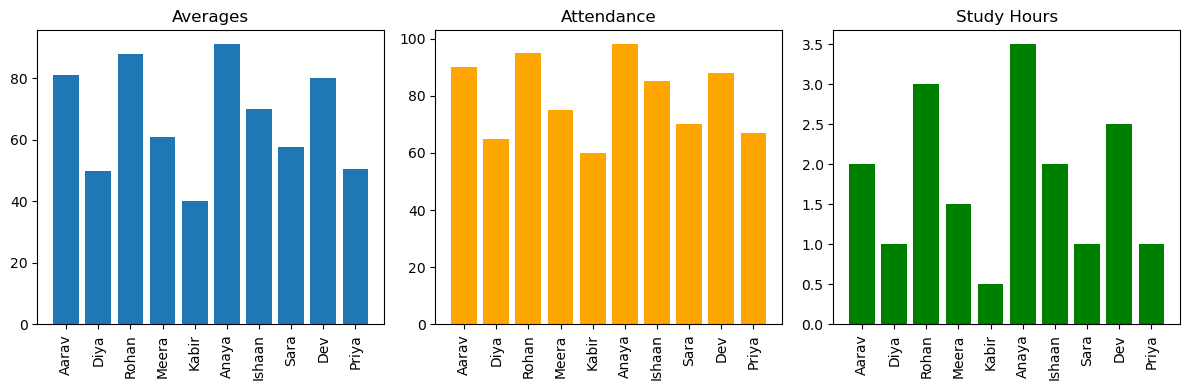

<function matplotlib.pyplot.bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'>

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Chart 1 — Average scores
plt.subplot(1,3,1)
plt.bar(data["Name"], data["Average"])
plt.xticks(rotation=90)
plt.title("Averages")

# Chart 2 — Attendance
plt.subplot(1,3,2)
plt.bar(data["Name"], data["Attendance"], color="orange")
plt.xticks(rotation=90)
plt.title("Attendance")

# Chart 3 — Study hours
plt.subplot(1,3,3)
plt.bar(data["Name"], data["StudyHours"], color="green")
plt.xticks(rotation=90)
plt.title("Study Hours")

plt.tight_layout()
plt.show()
plt.bar

In [11]:
data.sort_values("Average", ascending=False)

,Name,Math,Science,English,Attendance,StudyHours,Average,WeakSubject,ZeinAdvice,Grade,PredictedAverage
5,Anaya,91,89,93,98,3.5,91.000000,Science,Excellent performance! Try advanced exercises,A,91.595906
2,Rohan,88,92,84,95,3.0,88.000000,English,Excellent performance! Try advanced exercises,A,87.365059
0,Aarav,78,85,80,90,2.0,81.000000,Math,Excellent performance! Try advanced exercises,A,80.116426
8,Dev,82,78,80,88,2.5,80.000000,Science,Excellent performance! Try advanced exercises,A,78.281964
6,Ishaan,72,70,68,85,2.0,70.000000,English,Practice English and do weekly revision,B,74.051117
3,Meera,60,58,65,75,1.5,61.000000,Science,Practice Science and do weekly revision,C,61.328837
7,Sara,55,60,58,70,1.0,57.666667,Math,Improve attendance to at least 90%,C,54.671866
9,Priya,49,52,50,67,1.0,50.333333,Math,Improve attendance to at least 90%,C,51.032681
1,Diya,45,50,55,65,1.0,50.000000,Math,Improve attendance to at least 90%,C,48.606557
4,Kabir,35,40,45,60,0.5,40.000000,Math,Improve attendance to at least 90%,D,41.949586


In [12]:
pip install flask